In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

# Task -1 :  Import the "City_Air_Quality.csv" dataset. 

In [4]:
df = pd.read_csv("City_Air_Quality.csv",encoding="cp1252",low_memory=False)

# Task -2: Explore the dataset to understand its structure and content.

In [6]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [7]:
df.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [9]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [10]:
df.shape

(435742, 13)

# Task 3: Identify the relevant variables for visualizing AQI trends, such as date, pollutant levels, and AQI values.

In [66]:
# defining columns of importance, which shall be used reguarly
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

In [13]:
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[VALUE_COLS] = imputer.fit_transform(df[VALUE_COLS])

In [16]:
# checking to see if the dataset has any null values left over and the format
print(df.isnull().sum())

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27491
pm2_5                               0
date                                7
dtype: int64


In [17]:
df.fillna({
    'agency': 'Unknown',
    'location': 'Unknown',
    'type': df['type'].mode()[0]  # filling with mode
}, inplace=True)


In [18]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            0
agency                              0
type                                0
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27491
pm2_5                               0
date                                7
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
# Drop rows with any NaN values in place
df.isnull().sum()

stn_code                       0
sampling_date                  0
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
pm2_5                          0
date                           0
dtype: int64

# Task- 4: Create line plots or time series plots to visualize the overall AQI trend over time.

In [28]:
# defining a function that plots SO2, NO2, RSPM and SPM yearly average level
# since data is available monthly, it was resampled to a year and averaged t
# years for which no data was collected has not been imputed
def plot_for_state(state):
    fig, ax = plt.subplots(2,2, figsize=(20,12))
    fig.suptitle(state, size=20)

    ## Filtering the DataFrame for the specified state
    state = df[df.state == state]



    # Ensure 'date' is in datetime format and set as index
    state['date'] = pd.to_datetime(state['date'], errors='coerce')
    state = state.set_index('date')[VALUE_COLS]



    
    # Resampling to yearly average
    state = state.reset_index().set_index('date')[VALUE_COLS].resample('Y').mean()


    # Plotting SO2
    state.so2.plot(legend=True, ax=ax[0][0], title="so2")
    ax[0][0].set_ylabel("so2 (μg/m3)")
    ax[0][0].set_xlabel("Year")

    # Plotting NO2
    state.no2.plot(legend=True, ax=ax[0][1], title="no2")
    ax[0][1].set_ylabel("no2 (μg/m3)")
    ax[0][1].set_xlabel("Year")

    # Plotting RSPM
    state.rspm.plot(legend=True, ax=ax[1][0], title="rspm")
    ax[1][0].set_ylabel("RSPM (PM10 μg/m3)")
    ax[1][0].set_xlabel("Year")

    # Plotting SPM
    state.spm.plot(legend=True, ax=ax[1][1], title="spm")
    ax[1][1].set_ylabel("SPM (PM10 μg/m3)")
    ax[1][1].set_xlabel("Year")

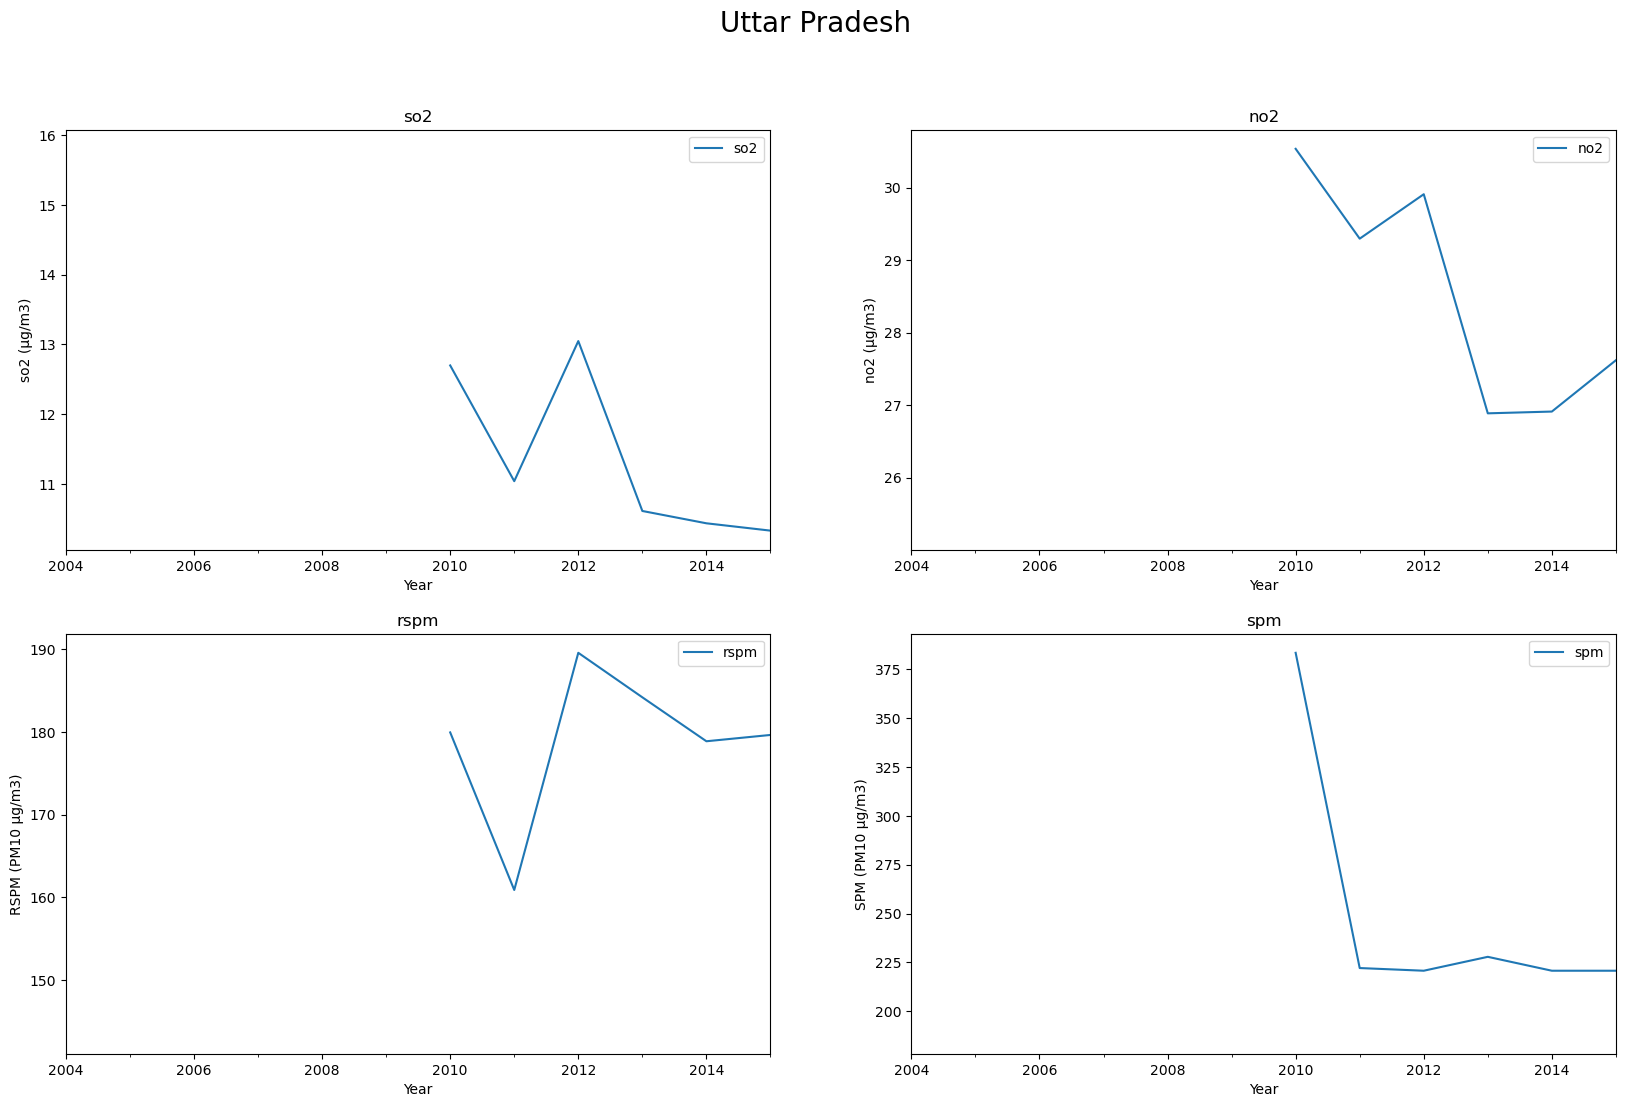

In [31]:
plot_for_state("Uttar Pradesh")

# Task - 6: Use bar plots or stacked bar plots to compare the AQI values across different dates or time periods.

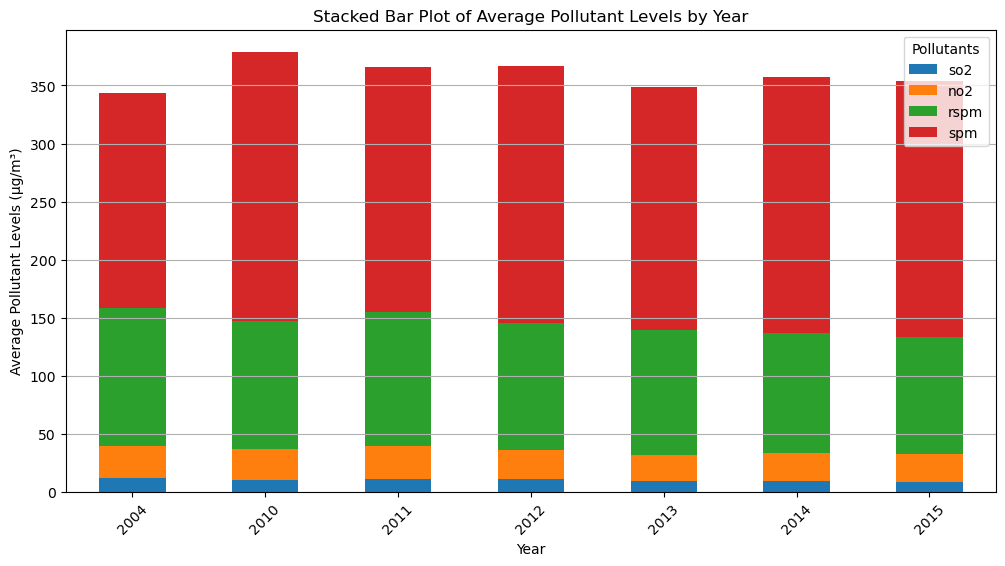

In [64]:
# If you want a stacked bar plot comparing multiple pollutants:
# First, create a DataFrame for multiple pollutants
pollutants = df.groupby('year')[['so2', 'no2', 'rspm', 'spm']].mean().reset_index()

# Plotting stacked bar plot
pollutants.set_index('year').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Plot of Average Pollutant Levels by Year')
plt.xlabel('Year')
plt.ylabel('Average Pollutant Levels (μg/m³)')
plt.xticks(rotation=45)
plt.legend(title='Pollutants')
plt.grid(axis='y')
plt.show()


# Task - 7: Create box plots or violin plots to analyze the distribution of AQI values for different pollutant categories. 

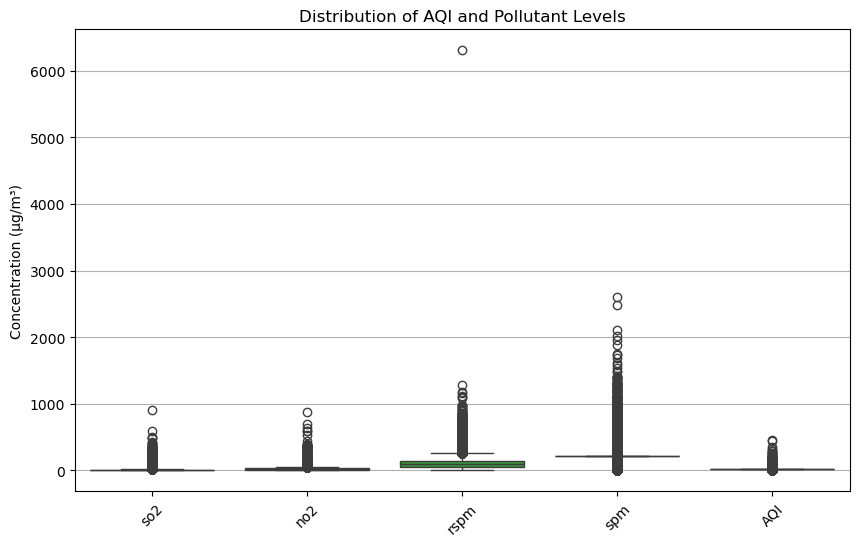

In [75]:
pollutants = ['so2', 'no2', 'rspm', 'spm']

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[pollutants + ['AQI']])
plt.title('Distribution of AQI and Pollutant Levels')
plt.ylabel('Concentration (μg/m³)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Task- 8: Use scatter plots or bubble charts to explore the relationship between AQI values and pollutant levels.

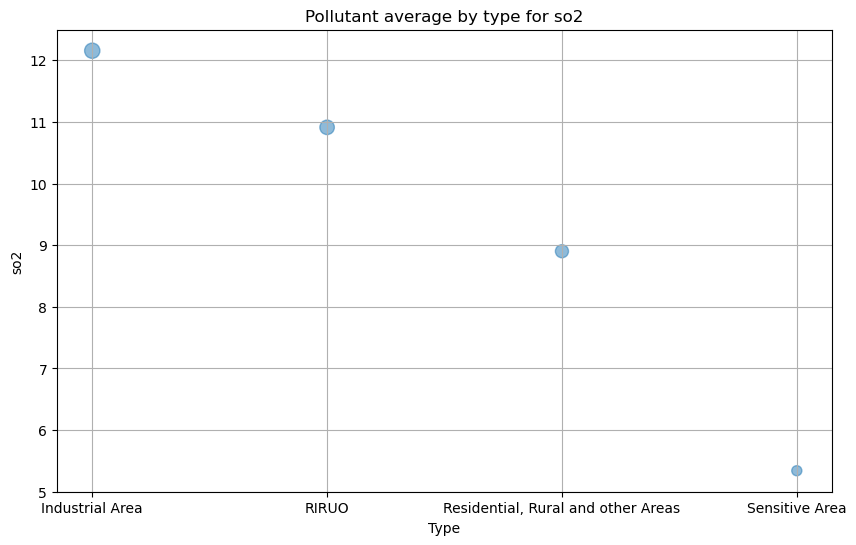

In [139]:
# Function to plot pollutant averages by type for a given indicator
def type_avg(indicator):

    
    # Calculate averages based on the given indicator grouped by 'type'
    avg_data = df.groupby('type')[indicator].mean().reset_index()

    
    
    # Prepare sizes for bubbles (e.g., using average values as sizes)
    sizes = avg_data[indicator] * 10           # Adjust multiplier as needed


    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(avg_data['type'], avg_data[indicator], s=sizes, alpha=0.5)
    plt.title("Pollutant average by type for {}".format(indicator))
    plt.xlabel("Type")
    plt.ylabel(indicator)
    plt.grid()
    plt.show()



# Call the function with the desired indicator
type_avg('so2')


# Task - 9: Customize the visualizations by adding labels, titles, legends, and appropriate color schemes

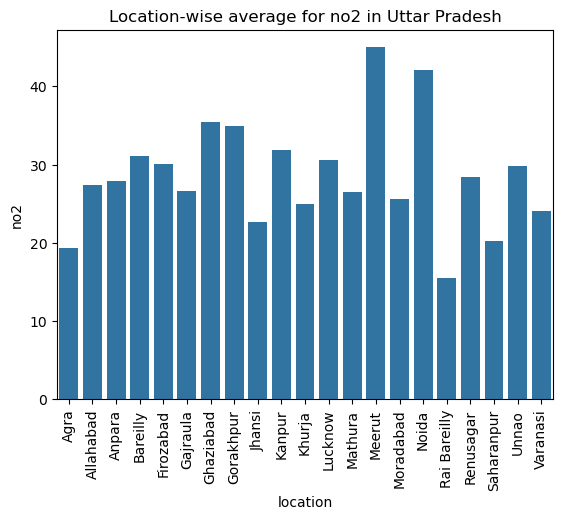

In [148]:
# Plotting pollutant averages by locations/state
# defining a function to plot pollutant averages for a given indicator (defaults to SO2)
def location_avgs(state, indicator="so2"):

    
    locs = df[VALUE_COLS + ['state', 'location', 'date']].groupby(['state','location']).mean()

    
    state_avgs = locs.loc[state].reset_index()

    
    sns.barplot(x='location', y=indicator, data=state_avgs)

    
    plt.title("Location-wise average for {} in {}".format(indicator, state))

    
    plt.xticks(rotation = 90)



location_avgs("Uttar Pradesh", "no2")

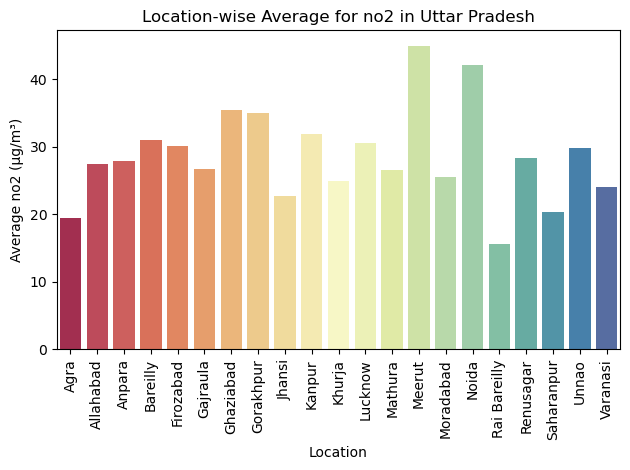

In [168]:
# Defining a function to plot pollutant averages for a given indicator (defaults to SO2)def location_avgs(state, indicator="so2"):
# Calculate average pollutant levels by state and location
def location_avgs(state, indicator):

    locs = df[VALUE_COLS + ['state', 'location', 'date']].groupby(['state', 'location']).mean()



    # Get averages for the specified state
    state_avgs = locs.loc[state].reset_index()



    # Create a bar plot with color
    sns.barplot(x='location', y=indicator, data=state_avgs, palette='Spectral')  # Added color palette



    plt.title("Location-wise Average for {} in {}".format(indicator, state))



    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.ylabel(f'Average {indicator} (μg/m³)')  # Custom y-axis label
    plt.xlabel('Location')  # Custom x-axis label
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()




# Call the function with the desired state and indicator
location_avgs("Uttar Pradesh", "no2")
